In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the general theme for the figures
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
sns.set_palette(palette = "colorblind", n_colors = 3)

# Statistical Functions

In [2]:
from scipy.stats import f_oneway, ttest_ind, chi2_contingency, fisher_exact
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
def tukey(df, metric, fillna = 0):
    print("~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~")
    
    if fillna==False and type(fillna)==bool: df = df.dropna(subset = [metric])

    #perform one-way ANOVA
    anova = f_oneway(
        list(df[df["Condition"]=="OC"][metric].fillna(fillna)),
        list(df[df["Condition"]=="RC"][metric].fillna(fillna)),
        list(df[df["Condition"]=="HC"][metric].fillna(fillna))
    )

    print(anova)

    # perform Tukey's test
    tukey = pairwise_tukeyhsd(endog=df[metric].fillna(fillna),
                            groups=df['Condition'],
                            alpha=0.05)

    print("~~~~~~~~~~~~~~~~Tukey test~~~~~~~~~~~~~~~~~")

    # display results
    print(tukey)
   
    # compute the starts
    stars_boundaries = [5e-2, 1e-2, 1e-3, 1e-4]
    stars = ['*'*list(pair<=stars_boundaries).count(True) + " "*list(pair<=stars_boundaries).count(False) for pair in tukey.pvalues]
    
    print(tukey.pvalues)
    print(stars)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")


In [4]:
def ttest(df, metric, equal_var=True ,fillna = 0):
    print("~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~")
    
    if fillna==False and type(fillna)==bool: df = df.dropna(subset = [metric])

    #perform one-way ANOVA
    anova = f_oneway(
        list(df[df["Condition"]=="OC"][metric].fillna(fillna)),
        list(df[df["Condition"]=="RC"][metric].fillna(fillna)),
        list(df[df["Condition"]=="HC"][metric].fillna(fillna))
    )

    print(anova)

    print("~~~~~~~~~~~~~~~~~~T-test~~~~~~~~~~~~~~~~~~~~")

    print(f'HC vs OC: {ttest_ind(list(df[df["Condition"]=="HC"][metric].fillna(fillna)),list(df[df["Condition"]=="OC"][metric].fillna(fillna))).pvalue:.5e}')
    print(f'HC vs RC: {ttest_ind(list(df[df["Condition"]=="HC"][metric].fillna(fillna)),list(df[df["Condition"]=="RC"][metric].fillna(fillna))).pvalue:.5e}')
    print(f'OC vs RC: {ttest_ind(list(df[df["Condition"]=="OC"][metric].fillna(fillna)),list(df[df["Condition"]=="RC"][metric].fillna(fillna))).pvalue:.5e}')
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Load the Dataset

In [5]:
df = pd.read_csv('results.csv', index_col="Unnamed: 0")  # TODO eliminate all unused columns

In [6]:
df.groupby("Condition")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
HC,23.0,24.130435,3.279473,21.0,22.0,23.0,25.5,34.0
OC,23.0,26.043478,4.986147,19.0,23.0,24.0,29.5,39.0
RC,23.0,24.304348,4.016271,19.0,22.0,23.0,25.0,38.0


# Perspective-Taking

## Confirms the results of the perspective-taken by the robot in the first task.

### Histogram of the time spent in the first perspective divided by the PT condition

Histogram

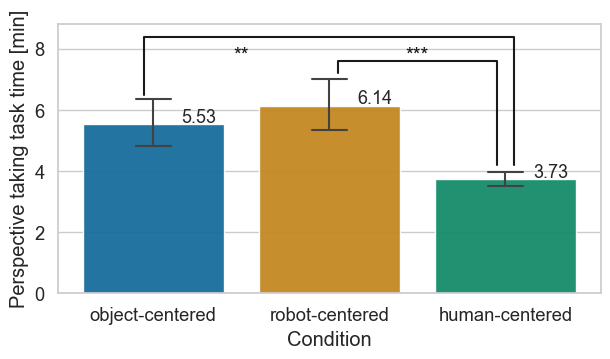

In [7]:
plt.figure(figsize=(7.0, 3.5))
g = sns.barplot(
    data=df.fillna(0).replace(["OC","HC","RC"], ["object-centered", "human-centered", "robot-centered"]),
    x="Condition",
    y="Perspective taking task time [min]",
    capsize = 0.2,
    errwidth=1.5,
    alpha=.95
)

# add significant values
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (33, 5), 
                   textcoords = 'offset points')

y1, y2, y3 = 6.5, 7.2, 4.2
h, col = 0.4, 'k'

plt.plot([-0.05, -0.05, 2.05, 2.05], [y1, y2+3*h, y2+3*h, y3], lw=1.5, c=col)
plt.text(0.5, y2+.7*h, "**", ha='center', va='bottom', color=col)

# plt.plot([0.05, 0.05, 0.95, 0.95], [y1, y2+h, y2+h, y2], lw=1.5, c=col)

plt.plot([1.05, 1.05, 1.95, 1.95], [y2, y2+h, y2+h, y3], lw=1.5, c=col)
plt.text(1.5, y2+.7*h, "***", ha='center', va='bottom', color=col)

plt.savefig("figures/PT time histogram.pdf",bbox_inches='tight')

ANOVA and Tukey statistical tests on the time spent in the PT by each condition

In [8]:
tukey(df, "Perspective taking task time [min]")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=12.848477834962202, pvalue=1.9374816569309807e-05)
~~~~~~~~~~~~~~~~Tukey test~~~~~~~~~~~~~~~~~
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    HC     OC   1.7983 0.0015  0.6155 2.9811   True
    HC     RC    2.404  0.001  1.2212 3.5867   True
    OC     RC   0.6057 0.4431 -0.5771 1.7884  False
---------------------------------------------------
[0.00151074 0.001      0.44305985]
['**  ', '*** ', '    ']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Heat map: conditoin versus reverse condition

Create a CMAP from a discret pallet, highlightning the transition red -> yellow representing the small values. Why? Because in the heatmap, the total column has high values, and by increasing the contrast before in the continous scale, I'm adding more contrast in on the heatmap per se.

In [9]:
from matplotlib.colors import ListedColormap

colorarray = sns.color_palette(palette = "colorblind", n_colors = 3)[:]
increment = [[colorarray[1][0]-colorarray[0][0], colorarray[1][1]-colorarray[0][1], colorarray[1][2]-colorarray[0][2]],[colorarray[2][0]-colorarray[1][0], colorarray[2][1]-colorarray[1][1], colorarray[2][2]-colorarray[1][2]]]
threshold = 33.0    # to control each increment is more significative in the continuous map
for i in range(98):
    if i < threshold: colorarray.insert(i+1,[colorarray[i][j]+increment[0][j]/threshold for j in range(3)])
    else: colorarray.insert(i+2,[colorarray[i+1][j]+increment[1][j]/(98-threshold) for j in range(3)])

cmap = ListedColormap(colorarray)

Heatmap

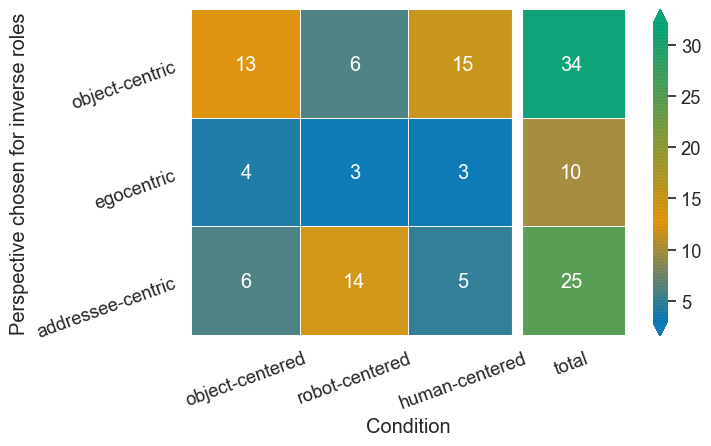

In [10]:
df_aux = df[["Condition", "If you were to tell the robot to pick up the objects how would you do it?"]].value_counts().copy()
df_heatmap = pd.DataFrame(columns=["Condition", "Perspective chosen for inverse roles", 'Occurrences'], dtype="float")
for condition_pair, occupance, in df_aux.iteritems():
    ideal_condition = "addressee-centric" if "your" in condition_pair[1] else "egocentric" if "my" in condition_pair[1] else "object-centric"
    df_heatmap = df_heatmap.append({
        "Condition": condition_pair[0],
        "Perspective chosen for inverse roles": ideal_condition,
        'Occurrences': occupance},
        ignore_index=True)

total = df_heatmap[["Perspective chosen for inverse roles", "Occurrences"]].groupby("Perspective chosen for inverse roles").sum().to_dict()["Occurrences"]
for key, value in total.items():
    df_heatmap = df_heatmap.append({
        "Condition": "total",
        "Perspective chosen for inverse roles": key,
        'Occurrences': value},
        ignore_index=True)

df_heatmap = df_heatmap.pivot("Perspective chosen for inverse roles", "Condition", "Occurrences")
# sorting
df_heatmap = df_heatmap[["OC", "RC", "HC","total"]]
df_heatmap = df_heatmap.reindex(["object-centric", "egocentric", "addressee-centric"])
df_heatmap.rename(columns = {"OC":"object-centered", "RC": "robot-centered", "HC": "human-centered"}, inplace = True)

plt.figure(figsize=(7.0, 5.0))
ax = sns.heatmap(df_heatmap, annot=True, cmap = cmap, square="True", cbar_kws={"extend": "both", "shrink": 0.85}, robust=True, linewidths=0.05,alpha=.95)
ax.axvline(3, color='white', lw=8)
plt.yticks(rotation=20)
plt.xticks(rotation=20)

plt.savefig(f"figures/Condition_chosen_for_inverse_roles.pdf",bbox_inches='tight')

Chi-square test on the Perspective chosen by condition

In [11]:
print(chi2_contingency(df_heatmap[["human-centered", "robot-centered", "object-centered"]]))
print(chi2_contingency(df_heatmap[["robot-centered", "object-centered"]]))
print(chi2_contingency(df_heatmap[["human-centered", "object-centered"]]))
print(chi2_contingency(df_heatmap[["human-centered", "robot-centered"]]))

(9.981176470588236, 0.04074595837884789, 4, array([[11.33333333, 11.33333333, 11.33333333],
       [ 3.33333333,  3.33333333,  3.33333333],
       [ 8.33333333,  8.33333333,  8.33333333]]))
(5.9218045112781965, 0.051772184348142326, 2, array([[ 9.5,  9.5],
       [ 3.5,  3.5],
       [10. , 10. ]]))
(0.37662337662337664, 0.8283564779591569, 2, array([[14. , 14. ],
       [ 3.5,  3.5],
       [ 5.5,  5.5]]))
(8.1203007518797, 0.017246425472900912, 2, array([[10.5, 10.5],
       [ 3. ,  3. ],
       [ 9.5,  9.5]]))


In [12]:
df_heatmap.loc[['object-centric', 'egocentric'], ["robot-centered", "object-centered"]]

Condition,robot-centered,object-centered
Perspective chosen for inverse roles,,
object-centric,6.0,13.0
egocentric,3.0,4.0


In [13]:
df_heatmap[["robot-centered", "object-centered"]]

Condition,robot-centered,object-centered
Perspective chosen for inverse roles,,
object-centric,6.0,13.0
egocentric,3.0,4.0
addressee-centric,14.0,6.0


## Personal Traits on answering the question: Do you think the manner the robot addressed the object influenced how much time you spent helping it?

ANOVA and tuukey tests on the answers to the question by group

In [14]:
tukey(df, "Do you think the manner the robot addressed the object influenced how much time you spent helping it?")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=5.848338540187446, pvalue=0.004588483518283926)
~~~~~~~~~~~~~~~~Tukey test~~~~~~~~~~~~~~~~~
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    HC     OC  -0.5217 0.6756 -2.0446  1.0011  False
    HC     RC   -2.087 0.0046 -3.6098 -0.5641   True
    OC     RC  -1.5652 0.0426 -3.0881 -0.0424   True
----------------------------------------------------
[0.67560894 0.00458526 0.04263353]
['    ', '**  ', '*   ']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Perspective-Taking Scale

2D Inference

Statistical analyses

In [15]:
tukey(df, "Perspective-Taking Scale")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=0.252902535899786, pvalue=0.7772926391471243)
~~~~~~~~~~~~~~~~Tukey test~~~~~~~~~~~~~~~~~
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    HC     OC  -0.0683    0.9 -0.4878 0.3512  False
    HC     RC   0.0559    0.9 -0.3636 0.4754  False
    OC     RC   0.1242 0.7389 -0.2953 0.5437  False
---------------------------------------------------
[0.9        0.9        0.73887006]
['    ', '    ', '    ']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Empathic Concern Scale

2D Inference

Statistical analyses

In [16]:
tukey(df, "Empathic Concern Scale")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=0.6112814224402205, pvalue=0.5456984253323292)
~~~~~~~~~~~~~~~~Tukey test~~~~~~~~~~~~~~~~~
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    HC     OC  -0.2236 0.5222 -0.7147 0.2675  False
    HC     RC  -0.1429  0.746 -0.6339 0.3482  False
    OC     RC   0.0807    0.9 -0.4103 0.5718  False
---------------------------------------------------
[0.52219444 0.74597413 0.9       ]
['    ', '    ', '    ']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Fantasy Scale

Statistical analyses

In [17]:
tukey(df, "Fantasy Scale")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=0.5942368587713747, pvalue=0.5549096517575077)
~~~~~~~~~~~~~~~~Tukey test~~~~~~~~~~~~~~~~~
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    HC     OC   0.1677 0.6465  -0.293 0.6284  False
    HC     RC  -0.0248    0.9 -0.4855 0.4359  False
    OC     RC  -0.1925 0.5731 -0.6532 0.2682  False
---------------------------------------------------
[0.64647125 0.9        0.57307768]
['    ', '    ', '    ']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Prosocial Behavior

## Analysis of the number of sentences read

### Prosocial Behavior metrics correlation

In [18]:
df[["Number of sentences read", "Prosocial behaviour time [min]", "Sentences read prior guess"]].fillna(0).corr()

,Number of sentences read,Prosocial behaviour time [min],Sentences read prior guess
Number of sentences read,1.000000,0.900477,0.728879
Prosocial behaviour time [min],0.900477,1.000000,0.683100
Sentences read prior guess,0.728879,0.683100,1.000000


In [19]:
pd.crosstab(df["Condition"], df["Did you read sentences to the robot?"])

Did you read sentences to the robot?,No,Yes
Condition,,
HC,0,23
OC,3,20
RC,10,13


In [20]:
x = chi2_contingency(pd.crosstab(df[df["Condition"]!="HC"]["Condition"], df["Did you read sentences to the robot?"]))
print(f"Chi-square test between RC and OC: Chi = {x[0]:.3f}\;p={x[1]:.3e}\;df={x[2]}")
x = chi2_contingency(pd.crosstab(df[df["Condition"]!="RC"]["Condition"], df["Did you read sentences to the robot?"]))
print(f"Chi-square test between HC and OC: Chi = {x[0]:.3f}\;p={x[1]:.3e}\;df={x[2]}")
chi2_contingency(pd.crosstab(df["Condition"], df["Did you read sentences to the robot?"]))

Chi-square test between RC and OC: Chi = 3.860\;p=4.945e-02\;df=1
Chi-square test between HC and OC: Chi = 1.426\;p=2.324e-01\;df=1


(14.975274725274726,
 0.0005599643916268729,
 2,
 array([[ 4.33333333, 18.66666667],
        [ 4.33333333, 18.66666667],
        [ 4.33333333, 18.66666667]]))

### Histogram of the sentences read by group

Histogram

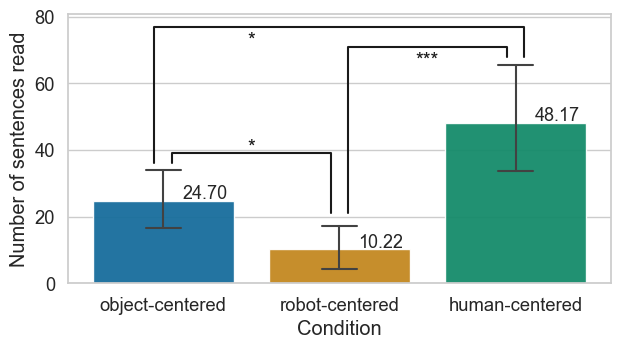

In [21]:
plt.figure(figsize=(7.0, 3.5))
g = sns.barplot(
    data=df.fillna(0).replace(["OC","HC","RC"], ["object-centered", "human-centered", "robot-centered"]),
    x="Condition",
    y="Number of sentences read",
    capsize = 0.2,
    errwidth=1.5,
    alpha=.95
)

# add significant values
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (30, 5), 
                   textcoords = 'offset points')

y1, y2, y3 = 36, 21, 68
h, col = 3, 'k'

plt.plot([-0.05, -0.05, 2.05, 2.05], [y1, y3+3*h, y3+3*h, y3], lw=1.5, c=col)
plt.text(0.5, y3+.6*h, "*", ha='center', va='bottom', color=col)

plt.plot([0.05, 0.05, 0.95, 0.95], [y1, y1+h, y1+h, y2], lw=1.5, c=col)
plt.text(0.5, y1+.6*h, "*", ha='center', va='bottom', color=col)

plt.plot([1.05, 1.05, 1.95, 1.95], [y2, y3+h, y3+h, y3], lw=1.5, c=col)
plt.text(1.5, y3-1.4*h, "***", ha='center', va='bottom', color=col)

plt.savefig("figures/PT time on sentences read histogram.pdf",bbox_inches='tight')  

Statistical Analyses

In [22]:
ttest(df, "Number of sentences read")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=11.02688981888106, pvalue=7.383559724802273e-05)
~~~~~~~~~~~~~~~~~~T-test~~~~~~~~~~~~~~~~~~~~
HC vs OC: 1.55511e-02
HC vs RC: 1.13675e-04
OC vs RC: 1.45968e-02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Inference of the time spent on the PT task on the sentences read

2D Inference

In [23]:
df[["Number of sentences read", "Prosocial behaviour time [min]", "Sentences read prior guess","Perspective taking task time [min]"]].fillna(0).corr()

,Number of sentences read,Prosocial behaviour time [min],Sentences read prior guess,Perspective taking task time [min]
Number of sentences read,1.000000,0.900477,0.728879,-0.336021
Prosocial behaviour time [min],0.900477,1.000000,0.683100,-0.275711
Sentences read prior guess,0.728879,0.683100,1.000000,-0.406511
Perspective taking task time [min],-0.336021,-0.275711,-0.406511,1.000000


## Possible confounding effects caused by different perspective on reading sentences

### Difficulty on following the instructions

2D Inference

Statistical analyses

In [24]:
tukey(df, "Instructions easy to follow [1-7]")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=3.5184757505773656, pvalue=0.03532179978409998)
~~~~~~~~~~~~~~~~Tukey test~~~~~~~~~~~~~~~~~
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    HC     OC  -0.3043 0.5934 -1.0596  0.4509  False
    HC     RC  -0.8261 0.0288 -1.5813 -0.0709   True
    OC     RC  -0.5217 0.2299  -1.277  0.2335  False
----------------------------------------------------
[0.59343875 0.0287927  0.22994114]
['    ', '*   ', '    ']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Need the robot for collecting speech data

2D Inference

Statistical analyses

In [25]:
tukey(df, "Need for collecting data [1-7]")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=0.5731357552581262, pvalue=0.56653546189198)
~~~~~~~~~~~~~~~~Tukey test~~~~~~~~~~~~~~~~~
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    HC     OC   0.2174 0.8898 -0.9564 1.3912  False
    HC     RC  -0.3043  0.789 -1.4782 0.8695  False
    OC     RC  -0.5217  0.537 -1.6956 0.6521  False
---------------------------------------------------
[0.88983914 0.7890189  0.53696623]
['    ', '    ', '    ']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [26]:
df[["Number of sentences read", "Need for collecting data [1-7]"]].fillna(0).corr()

,Number of sentences read,Need for collecting data [1-7]
Number of sentences read,1.00000,0.33004
Need for collecting data [1-7],0.33004,1.00000


# Numerical Analysis

Setences read per each condition

In [27]:
df[["Condition", "Number of sentences read"]].fillna(0).groupby("Condition")["Number of sentences read"].mean()

Condition
HC    48.173913
OC    24.695652
RC    10.217391
Name: Number of sentences read, dtype: float64

# Extras

In [28]:
from pingouin import mediation_analysis, read_dataset

In [29]:
df_aux = df[df["Condition"]!="HC"][["Condition", "Total scanning time [min]", "Number of sentences read"]].fillna(0).copy()
df_aux["Condition"] = df_aux["Condition"].replace(["RC", "OC"], [1, 0])
mediation_analysis(data=df_aux.fillna(0), x='Condition', m='Total scanning time [min]', y='Number of sentences read')

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Total scanning time [min] ~ X,0.372196,0.309561,0.235664,-0.251683,0.996074,No
1,Y ~ Total scanning time [min],-3.182997,2.882554,0.275497,-8.992403,2.626409,No
2,Total,-14.478261,5.694249,0.014597,-25.954266,-3.002256,Yes
3,Direct,-13.730321,5.818902,0.022904,-25.465255,-1.995387,Yes
4,Indirect,-0.747940,1.370242,0.472000,-6.736156,0.546282,No


In [30]:
df_aux = df[df["Condition"]!="RC"][["Condition", "Total scanning time [min]", "Number of sentences read"]].fillna(0).copy()
df_aux["Condition"] = df_aux["Condition"].replace(["HC", "OC"], [0, 1])
mediation_analysis(data=df_aux.fillna(0), x='Condition', m='Total scanning time [min]', y='Number of sentences read')

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Total scanning time [min] ~ X,0.939217,0.220361,0.000105,0.495110,1.383325,Yes
1,Y ~ Total scanning time [min],-8.532247,5.596173,0.134501,-19.810593,2.746098,No
2,Total,-23.478261,9.327609,0.015551,-42.276822,-4.679699,Yes
3,Direct,-21.849475,11.205944,0.057739,-44.448416,0.749466,No
4,Indirect,-1.628786,4.401851,0.620000,-9.343450,8.092472,No


In [31]:
df_aux = df[df["Condition"]!="OC"][["Condition", "Total scanning time [min]", "Number of sentences read"]].fillna(0).copy()
df_aux["Condition"] = df_aux["Condition"].replace(["RC", "HC"], [0, 1])
mediation_analysis(data=df_aux.fillna(0), x='Condition', m='Total scanning time [min]', y='Number of sentences read')

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Total scanning time [min] ~ X,-1.311413,0.235956,0.000002,-1.786951,-0.835875,Yes
1,Y ~ Total scanning time [min],-12.871138,4.829951,0.010727,-22.605265,-3.137012,Yes
2,Total,37.956522,8.956771,0.000114,19.905336,56.007708,Yes
3,Direct,35.874255,11.809973,0.004043,12.057175,59.691335,Yes
4,Indirect,2.082266,3.673944,0.612000,-5.159511,9.494274,No


In [32]:
tukey(df, "Caring [1-7]")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=3.319843978547051, pvalue=0.042287193837986056)
~~~~~~~~~~~~~~~~Tukey test~~~~~~~~~~~~~~~~~
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    HC     OC  -0.2174 0.8873 -1.3797  0.9449  False
    HC     RC  -1.1739 0.0472 -2.3362 -0.0116   True
    OC     RC  -0.9565 0.1268 -2.1188  0.2057  False
----------------------------------------------------
[0.88733529 0.04723139 0.12684602]
['    ', '*   ', '    ']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Generalise Linear Mixed Model Analysis

In [33]:
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from scipy.stats import normaltest

In [34]:
data = sm.datasets.get_rdataset("dietox", "geepack").data
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            



In [35]:
data = df[["Condition", "Prosocial behaviour time [min]", "Did you read sentences to the robot?"]].fillna(0).copy()
data.loc[data["Did you read sentences to the robot?"]=="No","Did you read sentences to the robot?"] = 0
data.loc[data["Did you read sentences to the robot?"]=="Yes","Did you read sentences to the robot?"] = 1
data["read"] = data["Did you read sentences to the robot?"].astype(int)
data["time"] = data["Prosocial behaviour time [min]"].astype(float)
data.dtypes

Condition                                object
Prosocial behaviour time [min]          float64
Did you read sentences to the robot?     object
read                                      int32
time                                    float64
dtype: object

In [36]:
md = smf.mixedlm("read ~ time", data, groups=data["Condition"])
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: read    
No. Observations: 69      Method:             REML    
No. Groups:       3       Scale:              0.1115  
Min. group size:  23      Log-Likelihood:     -28.5981
Max. group size:  23      Converged:          Yes     
Mean group size:  23.0                                
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.655    0.094 6.943 0.000  0.470  0.840
time          0.036    0.011 3.293 0.001  0.015  0.057
Group Var     0.015    0.064                          



c:\Users\Convidado\Desktop\Development\HRI2023---Conference-Paper\env\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


# Rebuttal


## Cronbachalpha reliability test

In [37]:
import pingouin as pg
from scipy import stats

In [38]:
df_iri = pd.read_csv('IRI.csv')
# df_iri['Condition'] = df["Condition"]
df_iri = df_iri.stack().reset_index().rename(columns={'level_0':'subject', 'level_1':'questions', 0:'scores'})
df_iri

,subject,questions,scores
0,0,"I daydream and fantasize, with some regularity...",4
1,0,"I often have tender, concerned feelings for pe...",3
2,0,I sometimes find it difficult to see things fr...,1
3,0,Sometimes I don't feel sorry for other people ...,3
4,0,I really get involved with the feelings of the...,4
...,...,...,...
1444,68,I would describe myself as a pretty soft-heart...,3
1445,68,"When I watch a good movie, I can very easily p...",2
1446,68,"When I'm upset at someone, I usually try to ""p...",1
1447,68,When I am reading an interesting story or nove...,2


In [39]:
scales={
    "Before criticizing somebody, I try to imagine how I would feel if I were in their place.":"Perspective-Taking Scale", 
    "If I'm sure I'm right about something, I don't waste much time listening to other people's arguments.":"Perspective-Taking Scale", 
    "I sometimes try to understand my friends better by imagining how things look from their perspective.":"Perspective-Taking Scale", 
    "I believe that there are two sides to every question and try to look at them both.":"Perspective-Taking Scale", 
    'I sometimes find it difficult to see things from the "other guy\'s" point of view.':"Perspective-Taking Scale", 
    "I try to look at everybody's side of a disagreement before I make a decision.":"Perspective-Taking Scale", 
    'When I\'m upset at someone, I usually try to "put myself in his shoes" for a while.':"Perspective-Taking Scale",
    "When I am reading an interesting story or novel, I imagine how I would feel if the events in the story were happening to me.":"Fantasy Scale", 
    "I really get involved with the feelings of the characters in a novel.":"Fantasy Scale", 
    "I am usually objective when I watch a movie or play, and I don\'t often get completely caught up in it.":"Fantasy Scale", 
    "After seeing a play or movie, I have felt as though I were one of the characters.":"Fantasy Scale", 
    "I daydream and fantasize, with some regularity, about things that might happen to me.":"Fantasy Scale", 
    "Becoming extremely involved in a good book or movie is somewhat rare for me.":"Fantasy Scale", 
    "When I watch a good movie, I can very easily put myself in the place of a leading character.":"Fantasy Scale", 
    "When I see someone being taken advantage of, I feel kind of protective toward them.":"Empathic Concern Scale", 
    "When I see someone being treated unfairly, I sometimes don't feel very much pity for them.":"Empathic Concern Scale", 
    "I often have tender, concerned feelings for people less fortunate than me.":"Empathic Concern Scale", 
    "I would describe myself as a pretty soft-hearted person.":"Empathic Concern Scale", 
    "Sometimes I don't feel sorry for other people when they are having problems.":"Empathic Concern Scale", 
    "Other people's misfortunes do not usually disturb me a great deal.":"Empathic Concern Scale", 
    "I am often quite touched by things that I see happen.":"Empathic Concern Scale"
}

In [40]:
df_iri['scales'] = df_iri['questions'].replace(scales)
df_iri

,subject,questions,scores,scales
0,0,"I daydream and fantasize, with some regularity...",4,Fantasy Scale
1,0,"I often have tender, concerned feelings for pe...",3,Empathic Concern Scale
2,0,I sometimes find it difficult to see things fr...,1,Perspective-Taking Scale
3,0,Sometimes I don't feel sorry for other people ...,3,Empathic Concern Scale
4,0,I really get involved with the feelings of the...,4,Fantasy Scale
...,...,...,...,...
1444,68,I would describe myself as a pretty soft-heart...,3,Empathic Concern Scale
1445,68,"When I watch a good movie, I can very easily p...",2,Fantasy Scale
1446,68,"When I'm upset at someone, I usually try to ""p...",1,Perspective-Taking Scale
1447,68,When I am reading an interesting story or nove...,2,Fantasy Scale


In [41]:
df_iri.loc[df_iri['scales']=='Perspective-Taking Scale', ['subject', 'scores']]

,subject,scores
2,0,1
6,0,2
8,0,3
11,0,2
15,0,4
...,...,...
1436,68,3
1439,68,0
1443,68,3
1446,68,1


In [42]:
pg.cronbach_alpha(data=df_iri[df_iri['scales']=='Perspective-Taking Scale'], items='questions', subject='subject', scores='scores')

(0.4507723320842456, array([0.227, 0.628]))

In [43]:
pg.cronbach_alpha(data=df_iri[df_iri['scales']=='Empathic Concern Scale'], items='questions', subject='subject', scores='scores')

(0.30894989398504663, array([0.028, 0.532]))

In [44]:
pg.cronbach_alpha(data=df_iri[df_iri['scales']=='Fantasy Scale'], items='questions', subject='subject', scores='scores')

(0.25630059053256027, array([-0.046,  0.496]))

### Is the data normal?

In [45]:
metric = ['Empathic Concern Scale', 'Fantasy Scale', 'Perspective-Taking Scale']
condition = ["OC", "RC", "HC"]
for m in metric:
    for c in condition:
        _, p = normaltest(df.loc[df["Condition"]==c, m])
        print(f"In the {m} and condition '{c}' the p value = {p}")
    _, p = normaltest(df[m])
    print(f"In the {m} through all conditions the p value = {p}")

In the Empathic Concern Scale and condition 'OC' the p value = 0.22186742209812674
In the Empathic Concern Scale and condition 'RC' the p value = 0.7807923575093265
In the Empathic Concern Scale and condition 'HC' the p value = 0.08414395382003328
In the Empathic Concern Scale through all conditions the p value = 0.3777182890811116
In the Fantasy Scale and condition 'OC' the p value = 0.6475929239738479
In the Fantasy Scale and condition 'RC' the p value = 0.341073739879798
In the Fantasy Scale and condition 'HC' the p value = 0.6902439998250957
In the Fantasy Scale through all conditions the p value = 0.42211761825855443
In the Perspective-Taking Scale and condition 'OC' the p value = 0.7632732418217016
In the Perspective-Taking Scale and condition 'RC' the p value = 0.33922075153788533
In the Perspective-Taking Scale and condition 'HC' the p value = 0.5396560195212399
In the Perspective-Taking Scale through all conditions the p value = 0.789422564594749


### Kruskal

In [46]:
metric = 'Empathic Concern Scale'
stats.kruskal(df.loc[df["Condition"]=='OC', metric], df.loc[df["Condition"]=='RC', metric], df.loc[df["Condition"]=='HC', metric])

KruskalResult(statistic=1.0634700654119054, pvalue=0.587584606243013)

In [47]:
metric = 'Fantasy Scale'
stats.kruskal(df.loc[df["Condition"]=='OC', metric], df.loc[df["Condition"]=='RC', metric], df.loc[df["Condition"]=='HC', metric])

KruskalResult(statistic=1.1881074286537714, pvalue=0.5520847486498133)

In [48]:
metric = 'Perspective-Taking Scale'
stats.kruskal(df.loc[df["Condition"]=='OC', metric], df.loc[df["Condition"]=='RC', metric], df.loc[df["Condition"]=='HC', metric])

KruskalResult(statistic=1.1456617047553528, pvalue=0.5639267835127747)

### Discretize data

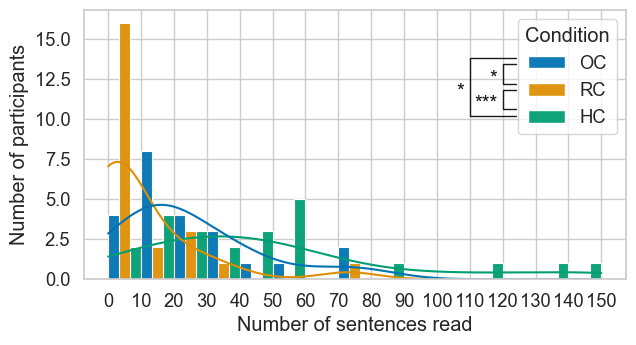

In [49]:
plt.figure(figsize=(7.0, 3.5))
sns.histplot(data=df.fillna(0), x="Number of sentences read", hue="Condition", binwidth=10, kde=True, multiple="dodge", alpha=.95)
plt.ylabel("Number of participants")
plt.xticks(np.arange(0, 151, step=10))

# OC - RC: P=1.96403e-02
plt.plot([124, 120, 120, 124], [13.4, 13.4, 12.2, 12.2], lw=1, c=col)
plt.text(117, 12.5, "*", ha='center', va='center', color=col)

# RC - HC: 2.66365e-04
plt.plot([124, 120, 120, 124], [11.8, 11.8, 10.6, 10.6], lw=1, c=col)
plt.text(115, 10.9, "***", ha='center', va='center', color=col)

# OC - HC: 2.00109e-02
plt.plot([124, 110, 110, 124], [13.8, 13.8, 10.2, 10.2], lw=1, c=col)
plt.text(107, 11.7, "*", ha='center', va='center', color=col)

plt.savefig("figures/Sentences read grouped dodge.pdf",bbox_inches='tight')

In [50]:
ttest(df, "Number of sentences read")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=11.02688981888106, pvalue=7.383559724802273e-05)
~~~~~~~~~~~~~~~~~~T-test~~~~~~~~~~~~~~~~~~~~
HC vs OC: 1.55511e-02
HC vs RC: 1.13675e-04
OC vs RC: 1.45968e-02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [51]:
df2 = df.fillna(0).copy()
df2["Number of sentences read"] = np.floor(df["Number of sentences read"].fillna(0) / 10)
ttest(df2, "Number of sentences read")

~~~~~~~~~~~~~~~one way ANOVA~~~~~~~~~~~~~~~
F_onewayResult(statistic=9.899616591146742, pvalue=0.0001737790668614395)
~~~~~~~~~~~~~~~~~~T-test~~~~~~~~~~~~~~~~~~~~
HC vs OC: 1.96403e-02
HC vs RC: 2.66365e-04
OC vs RC: 2.00109e-02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### IRI Distributions

c:\Users\Convidado\Desktop\Development\HRI2023---Conference-Paper\env\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":
c:\Users\Convidado\Desktop\Development\HRI2023---Conference-Paper\env\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
c:\Users\Convidado\Desktop\Development\HRI2023---Conference-Paper\env\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(-0.4, 5, 'Fantasy scale')

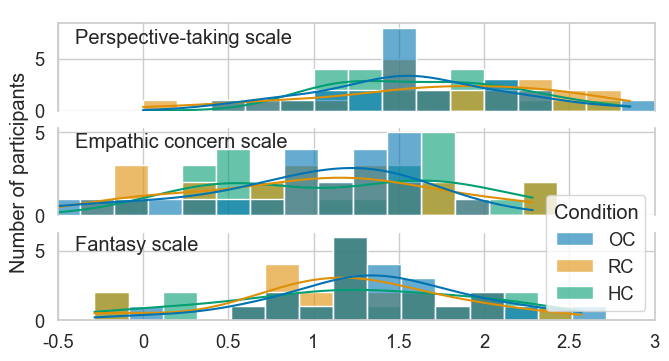

In [52]:
alpha=.6
binwidth=.2
multiple="layer"

fig, axes = plt.subplots(3, figsize=(7.7, 3.85))

sns.histplot(data=df.fillna(0), x='Perspective-Taking Scale', hue="Condition", hue_order=['OC','RC','HC'], binwidth=binwidth, kde=True, alpha=alpha, multiple=multiple, ax=axes[0], legend=False)
sns.despine(top=False, right=False, left=False, bottom=True, ax=axes[0])
axes[0].set_xticklabels([-.5, 0, .5, 1, 1.5, 2, 2.5, 3],fontdict={'fontsize': 0}, color='w')
axes[0].set_xlim(-.5,3)
axes[0].set_ylabel("")
axes[0].set_xlabel("")
plt.text(-.4,20, "Perspective-taking scale")

sns.histplot(data=df.fillna(0), x='Empathic Concern Scale', hue="Condition", hue_order=['OC','RC','HC'], binwidth=binwidth, kde=True, alpha=alpha, multiple=multiple, ax=axes[1], legend=False)
sns.despine(top=True, right=False, left=False, bottom=True, ax=axes[1])
axes[1].set_xticklabels([-.5, 0, .5, 1, 1.5, 2, 2.5, 3],fontdict={'fontsize': 0}, color='w')
axes[1].set_xlim(-.5,3)
axes[1].set_ylabel("Number of participants")
axes[1].set_xlabel("")
plt.text(-.4,12.5, "Empathic concern scale")

handles = sns.histplot(data=df.fillna(0), x='Fantasy Scale', hue="Condition", hue_order=['OC','RC','HC'], binwidth=binwidth, kde=True, alpha=alpha, multiple=multiple, ax=axes[2], legend=True)
sns.despine(top=True, right=False, left=False, bottom=False, ax=axes[2])
axes[2].set_xticklabels([-.5, 0, .5, 1, 1.5, 2, 2.5, 3])
axes[2].set_xlim(-.5,3)
axes[2].set_ylabel("")
axes[2].set_xlabel("")
plt.text(-.4,5, "Fantasy scale")

#plt.savefig("figures/IRI Distribution.pdf",bbox_inches='tight')

# DONE

In [53]:
from pingouin import ancova

In [54]:
ancova(data=df, covar='Perspective taking task time [min]', dv='Number of sentences read', between='Condition')

,Source,SS,DF,F,p-unc,np2
0,Condition,6163.757535,2,3.613341,0.033424,0.114298
1,Perspective taking task time [min],362.356046,1,0.424843,0.517196,0.007529
2,Residual,47763.338182,56,NaN,NaN,NaN


In [55]:
print("Done running")

Done running
